In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, mean_squared_log_error

from matplotlib import ticker
import matplotlib.pyplot as plt

In [ ]:
!pip install pmdarima
from pmdarima.arima import auto_arima

# Train test 8:2

In [ ]:
df = pd.read_csv('/content/ACB.VN-BaoCao.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,8533.238281,8619.142578,8447.333008,8590.507813,8254.484375,5164405.0
1,2019-03-04,8590.507813,8733.682617,8561.873047,8705.047852,8364.543945,10898750.0
2,2019-03-05,8705.047852,8790.953125,8619.142578,8676.413086,8337.029297,8611453.0
3,2019-03-06,8647.778320,8705.047852,8590.507813,8676.413086,8337.029297,11100248.0
4,2019-03-07,8705.047852,8790.953125,8676.413086,8733.682617,8392.058594,11530669.0


In [ ]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [ ]:
# Split the data into training, testing sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

In [ ]:
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [ ]:
# Auto ARIMA to select optimal ARIMA parameters
model = auto_arima(y_train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=0, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

print(model.summary())

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14943.298, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14939.297, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14941.296, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14941.303, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14938.424, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.604 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1050
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -7468.212
Date:                Mon, 17 Jun 2024   AIC                          14938.424
Time:                        04:43:13   BIC                          14943.380
Sample:                             0   HQIC                         14940.303
                               - 1050                                  

In [ ]:
order = (model.order[0], model.order[1], model.order[2])
print(order)

(0, 1, 0)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
def evaluate_ariama_model(x_data, y_data, order):
    y_pred = list()
    history = [x for x in y_train]
    for t in range(len(y_data)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        y_pred.append(yhat)
        obs = y_data[t]
        history.append(obs)
    mse = mean_squared_error(y_data, y_pred)
    mae = mean_absolute_error(y_data, y_pred)
    mape = mean_absolute_percentage_error(y_data, y_pred)
    rmse = mean_squared_error(y_data, y_pred, squared=False)
    return y_pred, mse, mae, mape, rmse

In [ ]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred, test_mse, test_mae, test_mape, test_rmse = evaluate_ariama_model(x_test, y_test, order)

print("Price predict on test data:", y_pred)
print("MSE on test data:", test_mse)
print("MAE on test data:", test_mae)
print("MAPE on test data:", test_mape)
print("RMSE on test data:", test_rmse)

Price predict on test data: [18865.785156, 18941.398438, 19168.242188, 19017.013672, 18979.205078, 18903.591797, 19017.013672, 19054.820313, 19206.048828, 18608.695313, 18956.521484, 18913.042969, 18956.521484, 19000.0, 18782.609375, 18739.130859, 18652.173828, 18782.609375, 18826.087891, 18869.564453, 18956.521484, 18826.087891, 18826.087891, 18869.564453, 18826.087891, 19043.478516, 19347.826172, 19304.347656, 19391.304688, 19043.478516, 19173.912109, 19173.912109, 19130.435547, 19086.957031, 18869.564453, 18869.564453, 19086.957031, 19130.435547, 19000.0, 19130.435547, 19130.435547, 19130.435547, 19130.435547, 19130.435547, 19130.435547, 19217.390625, 19173.912109, 19391.304688, 19391.304688, 19260.869141, 19304.347656, 19956.521484, 19869.564453, 20086.957031, 20391.304688, 21217.390625, 20652.173828, 20347.826172, 20173.912109, 19913.042969, 19913.042969, 20043.478516, 19869.564453, 19913.042969, 19739.130859, 19043.478516, 19130.435547, 19173.912109, 19000.0, 19173.912109, 19086.

In [ ]:
last_index = len(df)-1


# Create arrays for 90 days
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict for the next 30 days
y_next_90_days = list()
history = [x for x in y_test]
for t in range(len(x_next_90_days)):
    model = ARIMA(history, order=order)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    y_next_90_days.append(yhat)
    history.append(yhat)



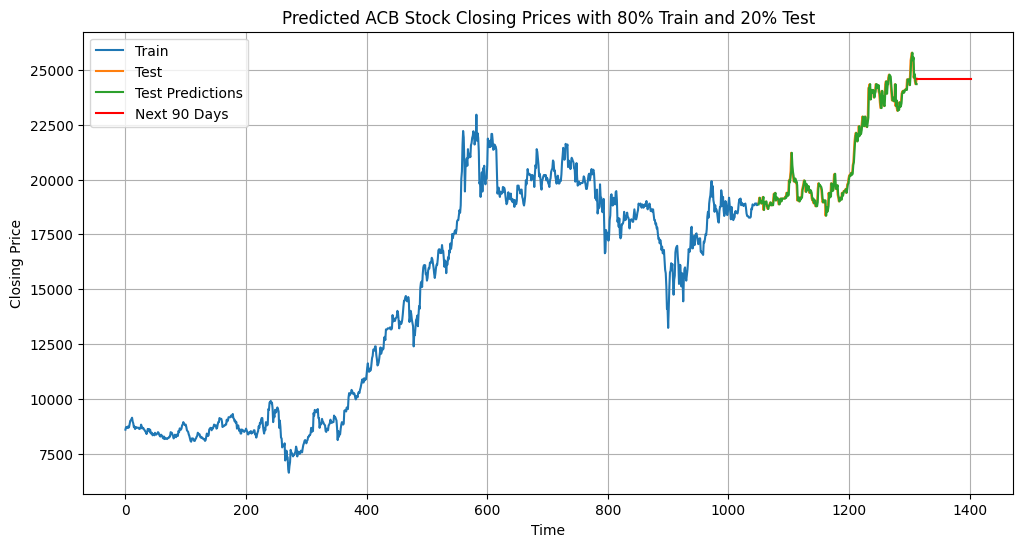

In [ ]:
plt.figure(figsize=(12,6))

# Plot the train, test, and validation data
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')

# Plot the predictions for test and validation sets
plt.plot(test_data.index, y_pred, label='Test Predictions')

# Plot the predictions for the next 90 days

plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, color='red', label='Next 90 Days')

# Adding titles and labels
plt.title('Predicted ACB Stock Closing Prices with 80% Train and 20% Test')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Train test 7:3

In [ ]:
df = pd.read_csv('/content/ACB.VN-BaoCao.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,8533.238281,8619.142578,8447.333008,8590.507813,8254.484375,5164405.0
1,2019-03-04,8590.507813,8733.682617,8561.873047,8705.047852,8364.543945,10898750.0
2,2019-03-05,8705.047852,8790.953125,8619.142578,8676.413086,8337.029297,8611453.0
3,2019-03-06,8647.778320,8705.047852,8590.507813,8676.413086,8337.029297,11100248.0
4,2019-03-07,8705.047852,8790.953125,8676.413086,8733.682617,8392.058594,11530669.0


In [ ]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [ ]:
# Split the data into training, testing sets
train_size = int(0.7 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

In [ ]:
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [ ]:
# Auto ARIMA to select optimal ARIMA parameters
model = auto_arima(y_train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=0, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

print(model.summary())

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13049.698, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13045.966, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13047.806, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13047.827, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13044.522, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.654 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  919
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6521.261
Date:                Mon, 17 Jun 2024   AIC                          13044.522
Time:                        05:00:00   BIC                          13049.344
Sample:                             0   HQIC                         13046.363
                                - 919                                  

In [ ]:
order = (model.order[0], model.order[1], model.order[2])
print(order)

(0, 1, 0)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
def evaluate_ariama_model(x_data, y_data, order):
    y_pred = list()
    history = [x for x in y_train]
    for t in range(len(y_data)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        y_pred.append(yhat)
        obs = y_data[t]
        history.append(obs)
    mse = mean_squared_error(y_data, y_pred)
    mae = mean_absolute_error(y_data, y_pred)
    mape = mean_absolute_percentage_error(y_data, y_pred)
    rmse = mean_squared_error(y_data, y_pred, squared=False)
    return y_pred, mse, mae, mape, rmse

In [ ]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred, test_mse, test_mae, test_mape, test_rmse = evaluate_ariama_model(x_test, y_test, order)

print("Price predict on test data:", y_pred)
print("MSE on test data:", test_mse)
print("MAE on test data:", test_mae)
print("MAPE on test data:", test_mape)
print("RMSE on test data:", test_rmse)

Price predict on test data: [15236.294922, 15614.367188, 16105.860352, 15689.981445, 15122.873047, 15727.788086, 15349.716797, 14442.34375, 15425.331055, 15916.824219, 15992.438477, 15576.55957, 15387.523438, 15614.367188, 15879.016602, 16257.088867, 16824.197266, 16748.582031, 16710.775391, 17013.232422, 17769.376953, 17844.990234, 16862.003906, 16862.003906, 17126.654297, 17429.111328, 17013.232422, 17429.111328, 17504.726563, 17542.533203, 17391.304688, 17202.267578, 17051.039063, 17240.076172, 17315.689453, 17315.689453, 16710.775391, 16710.775391, 16635.160156, 16635.160156, 16559.546875, 17164.460938, 17126.654297, 17277.882813, 17504.726563, 17466.917969, 17731.568359, 18298.675781, 18525.519531, 18260.869141, 18903.591797, 19130.435547, 19281.664063, 19659.734375, 19924.384766, 19206.048828, 19697.542969, 19054.820313, 18903.591797, 18525.519531, 18827.976563, 18601.134766, 18638.941406, 18525.519531, 18298.675781, 18071.833984, 18034.027344, 18563.326172, 18752.363281, 18752.3

In [ ]:
last_index = len(df)-1

# Create arrays for 90 days
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict for the next 30 days
y_next_90_days = list()
history = [x for x in y_test]
for t in range(len(x_next_90_days)):
    model = ARIMA(history, order=order)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    y_next_90_days.append(yhat)
    history.append(yhat)



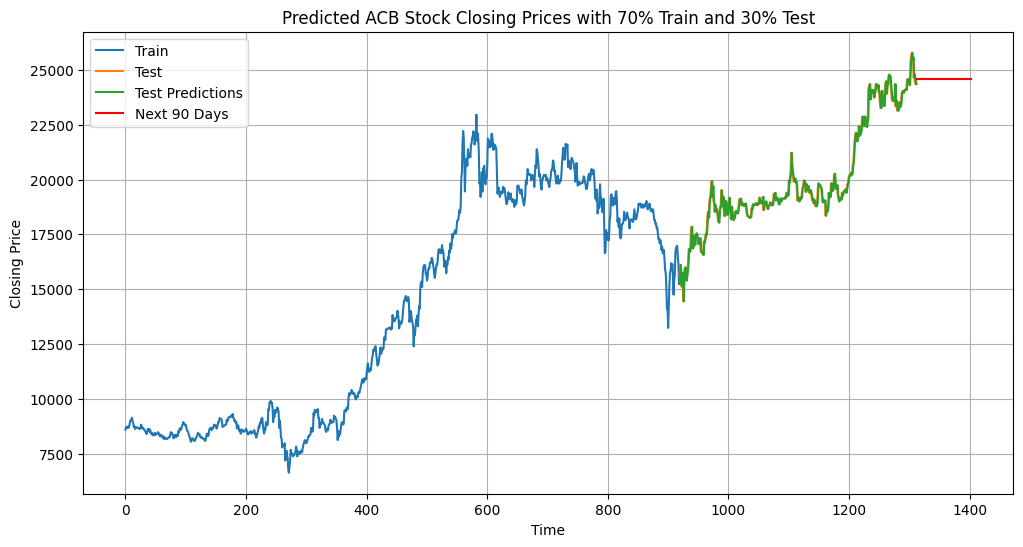

In [ ]:
plt.figure(figsize=(12,6))

# Plot the train, test, and validation data
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')

# Plot the predictions for test and validation sets
plt.plot(test_data.index, y_pred, label='Test Predictions')

# Plot the predictions for the next 90 days

plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, color='red', label='Next 90 Days')

# Adding titles and labels
plt.title('Predicted ACB Stock Closing Prices with 70% Train and 30% Test')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Train test 9:1

In [ ]:
df = pd.read_csv('/content/ACB.VN-BaoCao.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,8533.238281,8619.142578,8447.333008,8590.507813,8254.484375,5164405.0
1,2019-03-04,8590.507813,8733.682617,8561.873047,8705.047852,8364.543945,10898750.0
2,2019-03-05,8705.047852,8790.953125,8619.142578,8676.413086,8337.029297,8611453.0
3,2019-03-06,8647.778320,8705.047852,8590.507813,8676.413086,8337.029297,11100248.0
4,2019-03-07,8705.047852,8790.953125,8676.413086,8733.682617,8392.058594,11530669.0


In [ ]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [ ]:
# Split the data into training, testing sets
train_size = int(0.9 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

In [ ]:
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [ ]:
# Auto ARIMA to select optimal ARIMA parameters
model = auto_arima(y_train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=0, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

print(model.summary())

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16758.090, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16754.126, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16756.085, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16756.090, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16753.356, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.464 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1181
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -8375.678
Date:                Mon, 17 Jun 2024   AIC                          16753.356
Time:                        05:01:46   BIC                          16758.430
Sample:                             0   HQIC                         16755.269
                               - 1181                                  

In [ ]:
order = (model.order[0], model.order[1], model.order[2])
print(order)

(0, 1, 0)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
def evaluate_ariama_model(x_data, y_data, order):
    y_pred = list()
    history = [x for x in y_train]
    for t in range(len(y_data)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        y_pred.append(yhat)
        obs = y_data[t]
        history.append(obs)
    mse = mean_squared_error(y_data, y_pred)
    mae = mean_absolute_error(y_data, y_pred)
    mape = mean_absolute_percentage_error(y_data, y_pred)
    rmse = mean_squared_error(y_data, y_pred, squared=False)
    return y_pred, mse, mae, mape, rmse

In [ ]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred, test_mse, test_mae, test_mape, test_rmse = evaluate_ariama_model(x_test, y_test, order)

print("Price predict on test data:", y_pred)
print("MSE on test data:", test_mse)
print("MAE on test data:", test_mae)
print("MAPE on test data:", test_mape)
print("RMSE on test data:", test_rmse)

Price predict on test data: [19739.130859, 19304.347656, 19173.912109, 19000.0, 19043.478516, 19173.912109, 19086.957031, 19086.957031, 19391.304688, 19260.869141, 19391.304688, 19478.261719, 19478.261719, 19478.261719, 19565.216797, 19391.304688, 19565.216797, 19782.609375, 19826.087891, 20043.478516, 20173.912109, 20217.390625, 20173.912109, 20304.347656, 20217.390625, 20260.869141, 20652.173828, 20782.609375, 21260.869141, 21739.130859, 22000.0, 22130.435547, 22043.478516, 21739.130859, 21956.521484, 21956.521484, 22434.783203, 22000.0, 22086.957031, 22086.957031, 22260.869141, 22565.216797, 22869.564453, 22652.173828, 22434.783203, 22434.783203, 22869.564453, 22565.216797, 22565.216797, 22391.304688, 22608.695313, 22826.087891, 24173.912109, 24217.390625, 24347.826172, 23652.173828, 24000.0, 24086.957031, 23956.521484, 24086.957031, 24043.478516, 23739.130859, 23913.042969, 24000.0, 24347.826172, 24347.826172, 24173.912109, 24173.912109, 24304.347656, 24000.0, 23913.042969, 23521.7

In [ ]:
last_index = len(df)-1


# Create arrays for 90 days
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict for the next 30 days
y_next_90_days = list()
history = [x for x in y_test]
for t in range(len(x_next_90_days)):
    model = ARIMA(history, order=order)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    y_next_90_days.append(yhat)
    history.append(yhat)



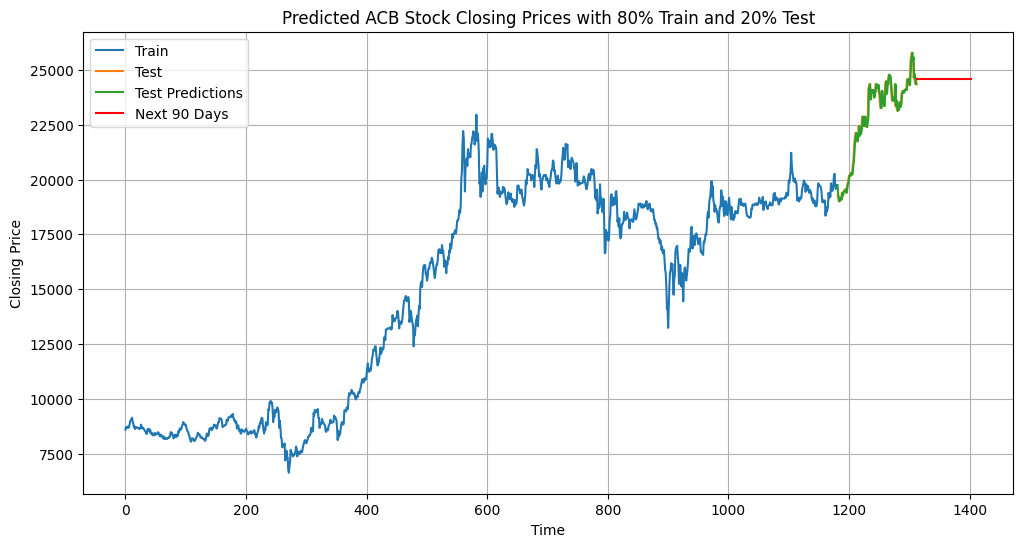

In [ ]:
plt.figure(figsize=(12,6))

# Plot the train, test, and validation data
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')

# Plot the predictions for test and validation sets
plt.plot(test_data.index, y_pred, label='Test Predictions')

# Plot the predictions for the next 90 days

plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, color='red', label='Next 90 Days')

# Adding titles and labels
plt.title('Predicted ACB Stock Closing Prices with 80% Train and 20% Test')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()